In [59]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from scipy.spatial.distance import cdist

In [2]:
df = pd.read_csv('dataset1.csv')

In [3]:
df.head()

,Customer Code,Gender,Age,New Customer,Customer Seniority(months),Customer relation type,Channel joined,Province,Gross Income
0,1375586,F,35,0,6,A,KHL,MALAGA,87218.10000
1,1050611,M,23,0,35,I,KHE,CIUDAD REAL,35548.74000
2,1050612,M,23,0,35,I,KHE,CIUDAD REAL,122179.11000
3,1050613,F,22,0,35,I,KHD,ZARAGOZA,119775.54000
4,1050614,M,23,0,35,A,KHE,ZARAGOZA,139646.15094


In [11]:
data = df.copy()

,Customer Code,Gender,Age,New Customer,Customer Seniority(months),Customer relation type,Channel joined,Province,Gross Income
0,1375586,F,35,0,6,A,KHL,MALAGA,87218.10000
1,1050611,M,23,0,35,I,KHE,CIUDAD REAL,35548.74000
2,1050612,M,23,0,35,I,KHE,CIUDAD REAL,122179.11000
3,1050613,F,22,0,35,I,KHD,ZARAGOZA,119775.54000
4,1050614,M,23,0,35,A,KHE,ZARAGOZA,139646.15094


In [31]:
Gender_lb = preprocessing.LabelEncoder()
relation_lb = preprocessing.LabelEncoder()
joined_lb = preprocessing.LabelEncoder()
prov_lb = preprocessing.LabelEncoder()

Gender_lb.fit(data['Gender'])
relation_lb.fit(data['Customer relation type'])
joined_lb.fit(data['Channel joined'])
prov_lb.fit(data['Province'])

data['Gender'] = Gender_lb.transform(data['Gender'])
data['Customer relation type'] = relation_lb.transform(data['Customer relation type']) 
data['Channel joined'] = joined_lb.transform(data['Channel joined'])
data['Province'] = prov_lb.transform(data['Province'])

data.head()

,Customer Code,Gender,Age,New Customer,Customer Seniority(months),Customer relation type,Channel joined,Province,Gross Income
0,1375586,0,35,0,6,0,149,31,87218.10000
1,1050611,1,23,0,35,1,146,16,35548.74000
2,1050612,1,23,0,35,1,146,16,122179.11000
3,1050613,0,22,0,35,1,145,51,119775.54000
4,1050614,1,23,0,35,0,146,51,139646.15094


In [35]:
df[['Gender','Age','Customer Seniority(months)','Customer relation type','Channel joined','Province', 'Gross Income']]

,Gender,Age,Customer Seniority(months),Customer relation type,Channel joined,Province,Gross Income
0,F,35,6,A,KHL,MALAGA,87218.10000
1,M,23,35,I,KHE,CIUDAD REAL,35548.74000
2,M,23,35,I,KHE,CIUDAD REAL,122179.11000
3,F,22,35,I,KHD,ZARAGOZA,119775.54000
4,M,23,35,A,KHE,ZARAGOZA,139646.15094
...,...,...,...,...,...,...,...
853018,F,27,22,A,KFC,MADRID,55516.98000
853019,F,56,22,A,KFC,"CORUÑA, A",75654.84000
853020,M,39,22,A,KFC,"CORUÑA, A",80634.87000
853021,M,36,22,A,KFC,MADRID,57818.46000


In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[['Gender','Age','Customer Seniority(months)','Customer relation type','Channel joined',
              'Province', 'Gross Income']])
y_kmeans = kmeans.predict(data[['Gender','Age','Customer Seniority(months)','Customer relation type','Channel joined',
              'Province', 'Gross Income']])

In [41]:
y_kmeans

array([3, 1, 0, ..., 3, 1, 3])

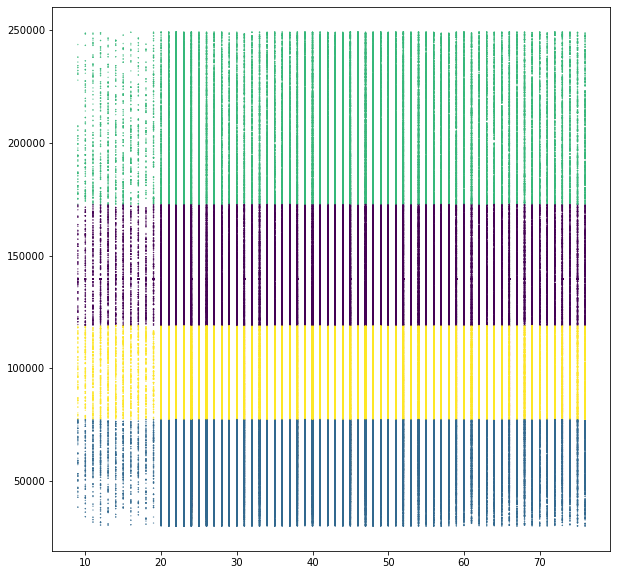

In [46]:
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000

fig,ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)

rects = ax.scatter(df['Age'],df['Gross Income'], c=y_kmeans, s=0.1)

plt.show()

### Caluculating Elbow method using distortion

In [60]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = data[['Gender','Age','Customer Seniority(months)','Customer relation type','Channel joined',
              'Province', 'Gross Income']]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [61]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 39751.68823745483
2 : 21745.029006819208
3 : 14706.331814293326
4 : 10326.245693782306
5 : 8968.418520063888
6 : 6863.19407177712
7 : 6005.101307798649
8 : 5296.478246176699
9 : 4646.272938309745


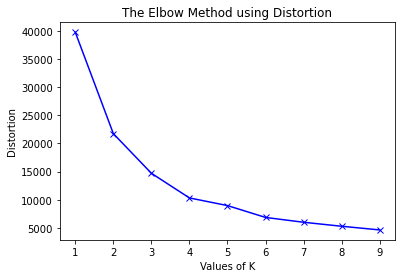

In [62]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [63]:
df.shape

(853023, 9)